# Some test scripts for the database unit tests and line integration functionality

In [2]:
import pycelp
import numpy as np
import pytest
import importlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
%matplotlib widget
import os,sys
import pickle
import time
from tqdm import tqdm
os.environ["XUVTOP"] = '../CLEDB_BUILD/config/CHIANTI_11.0_database/' ## If you havent already set the environment variable XUVTOP for the location of the database, set it here


In [3]:
sys.path.append("../")      ## append root folder so we cna import the modules

## constants and control params import
import constants as consts
import ctrlparams
params=ctrlparams.ctrlparams() ##Initialize and use a shorter label


## package functions import
import CLEDB_PROC.CLEDB_PROC as procinv
import CLEDB_PREPINV.CLEDB_PREPINV as prepinv

Estimate how detailed the atomic calculations need to be to ensure variation is under $10^{-2}$ in line ratios.

In [6]:
importlib.reload(prepinv)
importlib.reload(procinv)

<module 'CLEDB_PROC.CLEDB_PROC' from '/data/arparaschiv/solar-coronal-inversion/tests/../CLEDB_PROC/CLEDB_PROC.py'>

In [7]:
## Load the test data
data = np.load("../tests/sample_test_stokesspectra.npz")
sobs_in = [data["aas"].reshape(1,1,134,4),data["bbs"].reshape(1,1,134,4)]
head_in =[{'CRPIX1':0, 'CRPIX2':0, 'CRPIX3':0, 'CRVAL1': -0.30, 'CRVAL2': 1.05, 'CRVAL3': 1074.2571372, 'CDELT1': 0.0001, 'CDELT2':  0.0001, 'CDELT3': 0.00538654, 'LINEWAV': 1074.6153, 'INSTRUME': "PyCELP"},\
          {'CRPIX1':0, 'CRPIX2':0, 'CRPIX3':0, 'CRVAL1': -0.30, 'CRVAL2': 1.05, 'CRVAL3': 1079.4203968, 'CDELT1': 0.0001, 'CDELT2':  0.0001, 'CDELT3': 0.00541243, 'LINEWAV': 1079.7803, 'INSTRUME': "PyCELP"}]


sobs_tot,yobs,snr,background,issuemask,wlarr,keyvals,sobs_totrot,aobs,dobs=prepinv.sobs_preprocess(sobs_in,head_in,params)
#db_enc,dnames,db_enc_f,db_u,database,dbhdr=prepinv.sdb_preprocess(yobs,dobs,keyvals,params)
db_enc,database,dbhdr=prepinv.sdb_preprocess(yobs,dobs,keyvals,wlarr,params)
specout = procinv.spectro_proc(sobs_in,sobs_tot,snr,issuemask,background,wlarr,keyvals,consts,params)
blosout=procinv.blos_proc(sobs_tot,snr,issuemask,keyvals,consts,params)
invout,sfound=procinv.cledb_invproc(sobs_totrot,0,database,db_enc,yobs,aobs,dobs,snr,issuemask,dbhdr,keyvals,params.nsearch,params.maxchisq,params.bcalc,params.iqud,params.ncpu,params.reduced,params.verbose)


------------------------------------
----SOBS_PREPROCESS - READ START----
------------------------------------
Inverting observations of 2 coronal line(s) 
Line 1: Fe XIII 1074.7nm
Line 2: Fe XIII 1079.8nm
OBS_INTEGRATE: Integrating the Stokes IQUV spectra:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1966.85it/s]


OBS_DENS: Calculating observation LOS plasma density:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 868.39it/s]

0.526665  SECONDS FOR TOTAL OBS PREPROCESS INTEGRATION AND ROTATION
------------------------------------
--SOBS_PREPROCESS - READ FINALIZED--
------------------------------------
------------------------------------
----SDB_PREPROCESS - READ START-----
------------------------------------


SDB_PREPROCESS: Matching optimal database based on elongation and density:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 759.42it/s]

Available CLEDB databases cover a span of 99 solar heights between 1.01 - 2.0  radius
Load  1  heights x densities  DB datafiles in memory for each of  2 line(s).
------------------------------------
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/fe-xiii_1074/DB_h113_d790.npy
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/fe-xiii_1079/DB_h113_d790.npy
0.427683  SECONDS FOR TOTAL DB SEARCH AND FIND
------------------------------------
--SDB_PREPROCESS - READ FINALIZED---
------------------------------------
--------------------------------------
---SPECTRO_PROC - SPECTROSCOPY START--
--------------------------------------


SPECTRO_PROC: calculating spectroscopic line products for fe-xiii_1074:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1044.40it/s]


SPECTRO_PROC: calculating spectroscopic line products for fe-xiii_1079:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2417.47it/s]

0.235470  SECONDS FOR TOTAL SPECTROSCOPY PROCESSING
--------------------------------------
-SPECTRO_PROC - SPECTROSCOPY FINALIZED
--------------------------------------
--------------------------------------
---BLOS_PROC: B LOS ESTIMATION START--
--------------------------------------


BLOS_PROC: Calculating LOS Magnetic Field projection for fe-xiii_1074:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1250.17it/s]


BLOS_PROC: Calculating LOS Magnetic Field projection for fe-xiii_1079:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 4114.08it/s]

0.222816  SECONDS FOR TOTAL BLOS PROCESSING
--------------------------------------
-BLOS_PROC: BLOS ESTIMATION FINALIZED-
--------------------------------------
--------------------------------------
----CLEDB_INVPROC - INVERSION START---
--------------------------------------
CLEDB_INVPROC: Using a full database search of size: 41164200


CLEDB_INVPROC: Finding full Stokes IQUV database matches:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.71it/s]

--------------------------------------
--CLEDB_INVPROC - INVERSION FINALIZED-
--------------------------------------


In [7]:
10 ** np.rint(np.log10(10000/(10746)))

np.float64(1.0)

In [9]:
dobs


array([[7.907]], dtype=float32)

In [11]:
specout[0,0,1,:]

array([ 1.0798379e+03,  5.7617188e-02,  1.5996827e+01,  6.9092088e-09,
        7.2031075e-12, -1.2476148e-11, -3.1360799e-12,  5.0446521e-15,
        1.3391185e-01,  5.7319950e-02,  2.0850734e-03,  2.0855065e-03],
      dtype=float32)

In [9]:
blosout

array([[[[ 5.4486594 ,  5.197059  ,  5.319886  , -0.5235988 ],
         [ 5.2152147 ,  5.1935115 ,  5.20434   , -0.52359873]]]],
      dtype=float32)

In [10]:
sobs_tot

array([[[ 2.7957714e-09,  3.3037444e-11, -5.7222532e-11, -1.2028063e-13,
          9.8659891e-10,  1.0285656e-12, -1.7815277e-12, -4.1924008e-14]]],
      dtype=float32)

In [11]:
sfound[0,0,0,:]

array([ 2.7957714e-09,  3.3673914e-11, -5.7781970e-11, -1.4202411e-14,
        9.8874153e-10,  9.7458651e-13, -1.6723191e-12, -5.1852778e-15],
      dtype=float32)

In [12]:
invout[0,0,:,5]

array([ 8.469029 ,  8.46903  ,  7.267394 ,  7.2673955,  7.7998686,
        7.7998686, 10.621987 , 10.621987 ], dtype=float32)

In [13]:
invout[0,0,0,:]

array([ 1.1270100e+05,  2.0656830e-03,  7.9359999e+00,  1.0920165e+00,
       -2.0000000e-01,  8.4690294e+00,  6.0039330e+00,  7.3303831e-01,
        5.4473619e+00, -1.5620039e+00,  6.2937155e+00], dtype=float32)

In [14]:
np.sqrt((0.71*invout[0,0,0,8])**2+(0.71*invout[0,0,0,9])**2+(0.71*invout[0,0,0,10])**2)


np.float32(6.013011)

In [15]:
np.sqrt((0.71*invout[0,0,0,9])**2+(0.71*invout[0,0,0,10])**2)


np.float32(4.6041026)

In [16]:
sobs_tot[0,0,:]

array([ 2.7957714e-09,  3.3037444e-11, -5.7222532e-11, -1.2028063e-13,
        9.8659891e-10,  1.0285656e-12, -1.7815277e-12, -4.1924008e-14],
      dtype=float32)

In [17]:
sfound[0,0,0,:]

array([ 2.7957714e-09,  3.3673914e-11, -5.7781970e-11, -1.4202411e-14,
        9.8874153e-10,  9.7458651e-13, -1.6723191e-12, -5.1852778e-15],
      dtype=float32)

In [106]:
sfound2[0,0,0,:]

array([ 2.7957712e-09,  3.3673911e-11, -5.7781967e-11, -1.4202409e-13,
        9.8874153e-10,  9.7458651e-13, -1.6723190e-12, -5.1852772e-14],
      dtype=float32)

In [107]:
invout2[0,0,0,:]

array([ 1.1270100e+05,  2.0656856e-03,  7.9359999e+00,  1.0920165e+00,
       -2.0000000e-01,  6.0076528e+00,  6.0039330e+00,  7.3303831e-01,
        3.8641806e+00, -1.1080345e+00,  4.4645557e+00], dtype=float32)

In [108]:
invout[0,0,:2,0]

array([112701., 112749.], dtype=float32)

In [109]:
invout2[0,0,:4,0]

array([112701., 235641., 235689., 112749.], dtype=float32)

In [114]:
np.testing.assert_(np.isin(invout[0,0,:2,0],invout2[0,0,:4,0]).all())

In [25]:
params.verbose=0
invout,sfound=procinv.cledb_invproc(sobs_totrot,0,database,db_enc,yobs,aobs,dobs,snr,issuemask,dbhdr,keyvals,params.nsearch,params.maxchisq,0,False,params.ncpu,False,params.verbose)

## check first solution match to the observation.
np.testing.assert_allclose(sobs_tot[0,0,:], sfound[0,0,0,:],atol=5e-12) ## not really accurate to Stokes V, but the database accuracy in Stokes QU enforces this higher level.
##np.testing.assert_(np.isin(invout[0,0,1,0],[83661,83649])) ## check if first solution is in the best degenerate test. Disabled as this is a database dependent number that will change with regenerating
np.testing.assert_equal(invout[0,0,0,2],dobs) ## check if the correct density is matched.
np.testing.assert_equal(invout[0,0,0,3],yobs) ## check if the correct obs height is matched.
np.testing.assert_allclose(invout[0,0,0,5],6,atol=3) ##The calculated field strength is 6 gauss. There is no fitting for stokes V, and uncertainties result from fitting the LOS and density. It will be close, but not perfect.
np.testing.assert_equal(np.sqrt(invout[0,0,0,8]**2+invout[0,0,0,9]**2+invout[0,0,0,10]**2), invout[0,0,0,5])## check that the index matching anf the B calculation through indexes returns expected values.

## Now test the intercomparison between matching with IQUV or IQUD; Bpos from simulation is ~4.60
invout2,sfound2=procinv.cledb_invproc(sobs_totrot,np.array((4.60)).reshape(1,1,1),database,db_enc,yobs,aobs,dobs,snr,issuemask,dbhdr,keyvals,params.nsearch,params.maxchisq,3,True,params.ncpu,False,params.verbose)
np.testing.assert_allclose(sobs_tot[0,0,:], sfound2[0,0,0,:],atol=5e-12) ## Are we getting a very similar if not the same solution vector?
np.testing.assert_(np.isin(invout[0,0,:2,0],invout2[0,0,:4,0]).all())    ## Check that both solutions of the full inversion are in the set of 4 solutions of the IQUD inversion.
np.testing.assert_allclose(invout2[0,0,0,5],6,atol=3)                    ## Are we getting a similar field strength scaling? This is on papermore accurate than scaling minuscule Stokes V signals, but will depend on measuring waves propagation.
np.testing.assert_allclose(np.sqrt(invout2[0,0,0,8]**2+invout2[0,0,0,9]**2+invout2[0,0,0,10]**2), invout2[0,0,0,5],atol=3)## check that the index matching anf the B calculation through indexes returns expected values in the IQUD case. Indexes ARE handles differently



In [17]:
10 ** np.rint(np.log10(10000/(aas[0][0]/10)))

np.float64(10.0)

In [2]:
import pycelp
import numpy as np
from scipy.integrate import simpson,trapezoid

fe13 = pycelp.Ion('fe_13',nlevels = 100)
#fe13.calc_rho_sym(1.17e8,fe13.get_maxtemp(), 0.05, 0, include_limbdark=True, include_protons=True)
fe13.calc_rho_sym(10**(7.991),fe13.get_maxtemp(), 0.092, 0, include_limbdark=True, include_protons=True)
ln1 = fe13.get_emissionLine(10747.)
ln2 = fe13.get_emissionLine(10798.)
aat = ln1.calc_PolEmissCoeff(6,thetaBLOSdeg=30,azimuthBLOSdeg=30,)
aas = ln1.calc_stokesSpec(6,thetaBLOSdeg=30,azimuthBLOSdeg=30,doppler_velocity=16.0, non_thermal_turb_velocity=0.0, doppler_spectral_range=(-100, 100), specRes_wv_over_dwv=200000)
bbt = ln2.calc_PolEmissCoeff(6,thetaBLOSdeg=30,azimuthBLOSdeg=30,)
bbs = ln2.calc_stokesSpec(6,thetaBLOSdeg=30,azimuthBLOSdeg=30,doppler_velocity=16.0, non_thermal_turb_velocity=0.0, doppler_spectral_range=(-100, 100), specRes_wv_over_dwv=200000)

print("---------------------------------------------")
print("Stokes I ")
print("1074 SI int. of the spectra ",np.sum(aas[1][:-1,0]*10* np.diff(aas[0]/10 )))
print("1074 SI emission coefficient",aat[0])
print("1079 SI int. of the spectra ",np.sum(bbs[1][:-1,0]* np.diff(bbs[0] )))
print("1079 SI emission coefficient",bbt[0])

print("---------------------------------------------")
print("Stokes Q ")
print("1074 SQ int. of the spectra ",np.sum(aas[1][:-1,1]*10* np.diff(aas[0]/10 )))
print("1074 SQ emission coefficient",aat[1])
print("1079 SQ int. of the spectra ",np.sum(bbs[1][:-1,1]* np.diff(bbs[0] )))
print("1079 SQ emission coefficient",bbt[1])

print("---------------------------------------------")
print("Stokes U ")
print("1074 SU int. of the spectra ",np.sum(aas[1][:-1,2]*10* np.diff(aas[0]/10 )))
print("1074 SU emission coefficient",aat[2])
print("1079 SU int. of the spectra ",np.sum(bbs[1][:-1,2]* np.diff(bbs[0] )))
print("1079 SU emission coefficient",bbt[2])

print("---------------------------------------------")
print("Stokes V ")
dIdlnorm_fact = np.gradient(aas[1][:,0]*10 / aat[0], aas[0]/10)
print("1074 SV int. of the spectra ", np.nanmedian(aas[1][20:-20,3]*10/ dIdlnorm_fact[20:-20]) *10 ** np.rint(np.log10(10000/(aas[0][0]/10))) 
) ## minus comes for the negative lobe coming first
print("1074 SV emission coefficient",aat[3])


dIdlnorm_fact = np.gradient(aas[1][:,0] / aat[0], aas[0])
print("1074 SV int. of the spectra ", np.nanmedian(aas[1][20:-20,3]/dIdlnorm_fact[20:-20]) )  ## minus comes for the negative lobe coming first
print("1074 SV emission coefficient",aat[3])

dIdlnorm_fact = np.gradient(bbs[1][:,0] / bbt[0], bbs[0])
print("1079 SV int. of the spectra ", np.nanmedian(bbs[1][20:-20,3]/dIdlnorm_fact[20:-20]) )
print("1079 SV emission coefficient",bbt[3])

# print("1074 numpy trapezoid integration, 2 versions")
# print(-np.trapz(np.abs(aas[1][:,3]),x=aas[0]))                                    ## ## same application of minus sign
# print(-np.trapz(np.abs(aas[1][:,3]),dx=np.diff(aas[0])))
# print("1074 Scipy implementations")

# print("(Simpson's Rule):",    -simpson(np.abs(aas[1][:,3]), aas[0]))              ## same application of minus sign
# print("(trapezoidal rule):",  -trapezoid(np.abs(aas[1][:,3]), aas[0]))

# print("1074 Scipy trapezoid with integrating lobes separately")
# # gg1 = aas[1][:,3]
# # ggmin = gg1[gg1<0]
# # ggmax = gg1[gg1>0]
# # #print(gg1.shape,ggmin.shape,ggmax.shape,78+56)
# # print(-(np.abs(trapezoid(ggmin,aas[0][:78]))+np.abs(trapezoid(ggmax,aas[0][:56]))))  ## same application of minus sign

# print("None of these match the emission coefficient: the scaling diff is:")
# print(-np.sum(np.abs(aas[1][:-1,3])* np.diff(aas[0] ))/aat[3])

# norm_fact=np.gradient(aas[1][:,0]/aat[0],aas[0])
# print(np.min(-aas[1][:,3]/norm_fact))
# print(np.min(-aas[1][:,3]/norm_fact)/aat[3])
print("Line ratio:")
print('Emission coeffs:',aat[0]/bbt[0])
print('Integrated Coeffs.', np.sum(aas[1][:-1,0]* np.diff(aas[0] )) / np.sum(bbs[1][:-1,0]* np.diff(bbs[0] )))

 reading:  ../CLEDB_BUILD/config/CHIANTI_11.0_database/fe/fe_13/fe_13.elvlc
 reading:  ../CLEDB_BUILD/config/CHIANTI_11.0_database/fe/fe_13/fe_13.wgfa
 reading:  ../CLEDB_BUILD/config/CHIANTI_11.0_database/fe/fe_13/fe_13.scups
 reading:  ../CLEDB_BUILD/config/CHIANTI_11.0_database/fe/fe_13/fe_13.psplups
 using default abundances: ../CLEDB_BUILD/config/CHIANTI_11.0_database/abundance/sun_photospheric_2021_asplund.abund
 reading:  ../CLEDB_BUILD/config/CHIANTI_11.0_database/abundance/sun_photospheric_2021_asplund.abund
 testing default file: ../CLEDB_BUILD/config/CHIANTI_11.0_database/ioneq/chianti.ioneq
 reading:  ../CLEDB_BUILD/config/CHIANTI_11.0_database/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
---------------------------------------------
Stokes I 
1074 SI int. of the spectra  2.7956915818928154e-09

In [18]:
aas[0][1]/10-aas[0][0]/10

np.float64(0.005386543069334948)

 epsIa 3.704211799153005e-09
 epsQa 3.175495323879094e-11
 epsUa -5.500119240155978e-11
 epsVa -2.64017275970232e-13


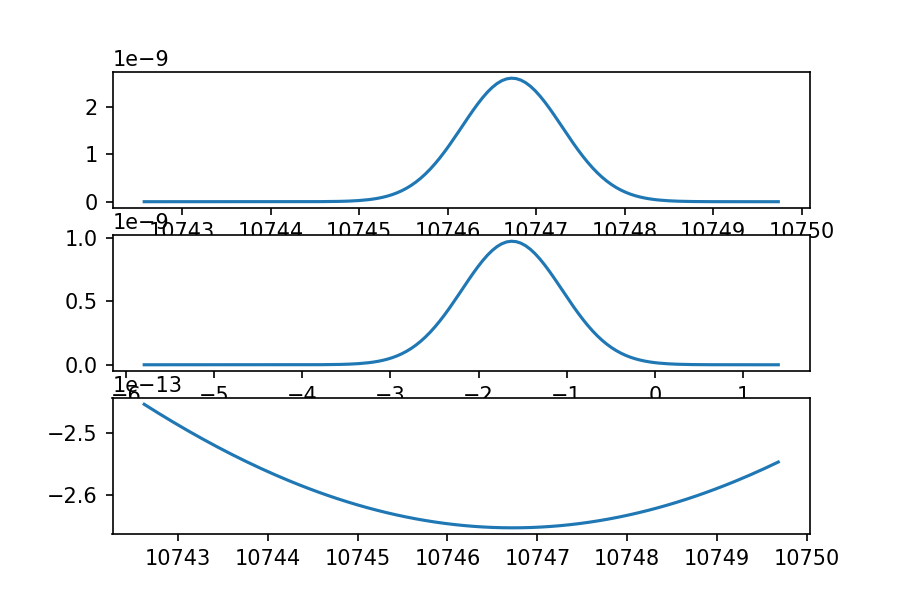

In [142]:
epsIa,epsQa,epsUa,epsVa = aat
wva,stksa = aas
wva.shape,stksa.shape
wvb,stksb = bbs
wvb.shape,stksb.shape
print(f" epsIa {epsIa}")
print(f" epsQa {epsQa}")
print(f" epsUa {epsUa}")
print(f" epsVa {epsVa}")

fig,ax = plt.subplots(3,1,figsize = (6,4))
ax = ax.flatten()
ax[0].plot(wva,stksa[:,0],label = 'Stokes I')
ax[1].plot(wvb,stksb[:,0],label = 'Stokes I')
# ax[2].plot(wva,stksa[:,0] / epsIa ,label = 'Stokes I divided by epsIa')
# print(f"Integral of StksI/epsIa: {np.trapz(stksa[:,0] / epsIa, wva)}   (SHOULD BE VERY CLOSE TO 1)")
# ax[2].plot(wva,stksa[:,3],label = 'Stokes V')# get normalized derivative of I
# dIdlambda_norm = np.gradient(stksa[:,0]/epsIa,wva)
# ax[2].plot(wva, epsVa* dIdlambda_norm,'o',fillstyle = 'none',markersize= 2,label = 'epsVa * dIdlambda_norm')
ax[2].plot(wva[1:-1], stksa[1:-1,3] /  dIdlambda_norm[1:-1] ,label = 'Stks V / dIdlambda_norm ')
# ax[3].axhline(epsVa,ls = 'dashed',label = 'epsVa',color = 'black')
# ax[3].set_ylim(-2e-12,-2e-12)
# ax[3].set_ylim(2e-12,2e-12)
# for axi in ax:
#     axi.legend()
# fig.tight_layout()

# print(np.mean(stksa[:,3] /  dIdlambda_norm ))

 epsIa 2.795691560511653e-09
 epsQa 3.303650095438116e-11
 epsUa -5.722089815728586e-11
 epsVa -1.2032023752326374e-12
Integral of StksI/epsIa: 0.9999999459009329   (SHOULD BE VERY CLOSE TO 1)


/tmp/ipykernel_3750337/3909755683.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(f"Integral of StksI/epsIa: {np.trapz(stksa[:,0] / epsIa, wva)}   (SHOULD BE VERY CLOSE TO 1)")


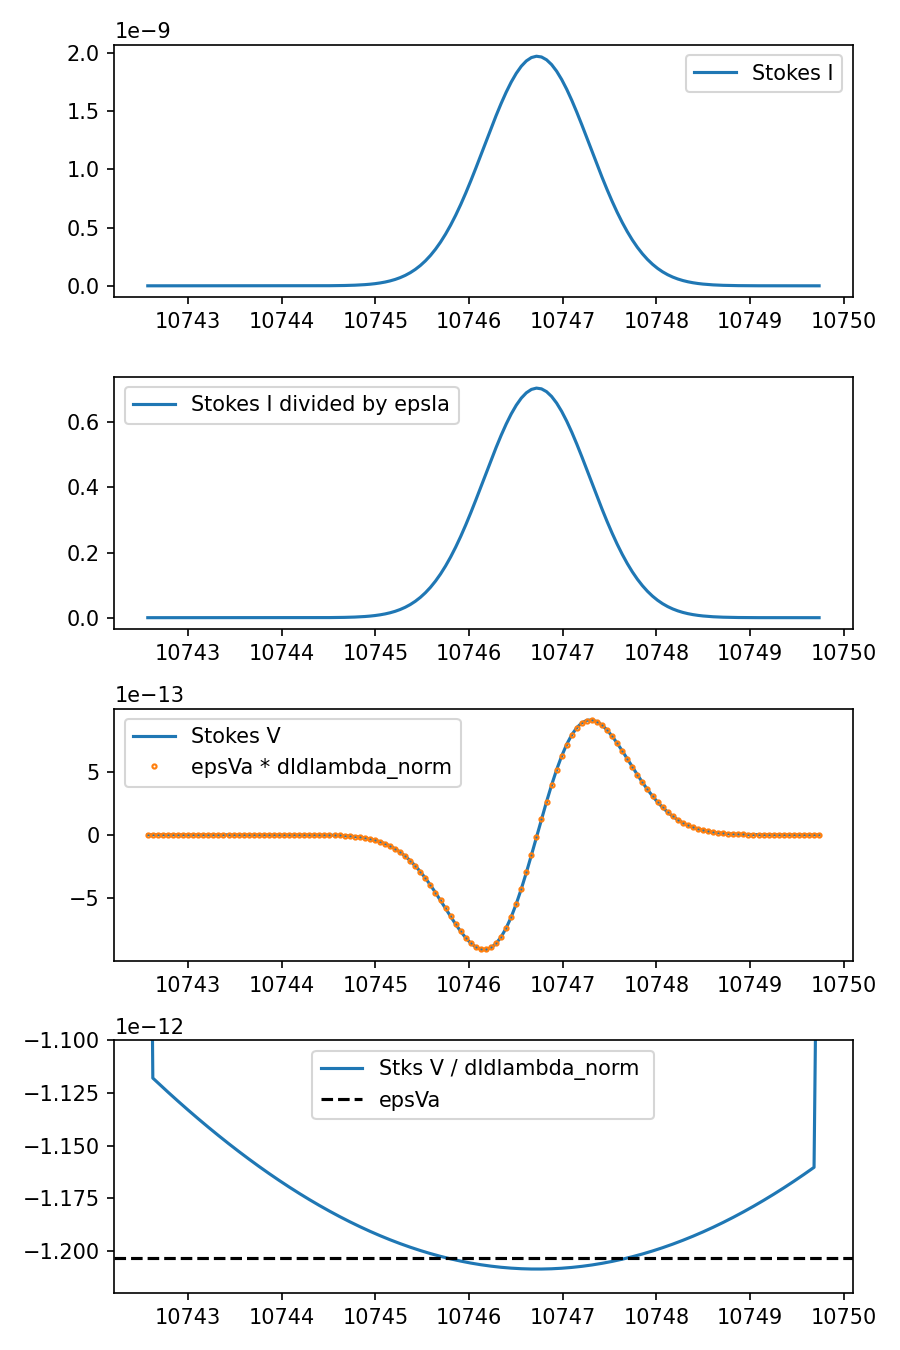

In [93]:
epsIa,epsQa,epsUa,epsVa = aat
wva,stksa = aas
wva.shape,stksa.shape
print(f" epsIa {epsIa}")
print(f" epsQa {epsQa}")
print(f" epsUa {epsUa}")
print(f" epsVa {epsVa}")
fig,ax = plt.subplots(4,1,figsize = (6,9))
ax = ax.flatten()
ax[0].plot(wva,stksa[:,0],label = 'Stokes I')
ax[1].plot(wva,stksa[:,0] / epsIa ,label = 'Stokes I divided by epsIa')
print(f"Integral of StksI/epsIa: {np.trapz(stksa[:,0] / epsIa, wva)}   (SHOULD BE VERY CLOSE TO 1)")
ax[2].plot(wva,stksa[:,3],label = 'Stokes V')# get normalized derivative of I
dIdlambda_norm = np.gradient(stksa[:,0]/epsIa,wva)
ax[2].plot(wva, epsVa* dIdlambda_norm,'o',fillstyle = 'none',markersize= 2,label = 'epsVa * dIdlambda_norm')
ax[3].plot(wva, stksa[:,3] /  dIdlambda_norm ,label = 'Stks V / dIdlambda_norm ')
ax[3].axhline(epsVa,ls = 'dashed',label = 'epsVa',color = 'black')
ax[3].set_ylim(-1.22e-12,-1.1e-12)
for axi in ax:
    axi.legend()
fig.tight_layout()

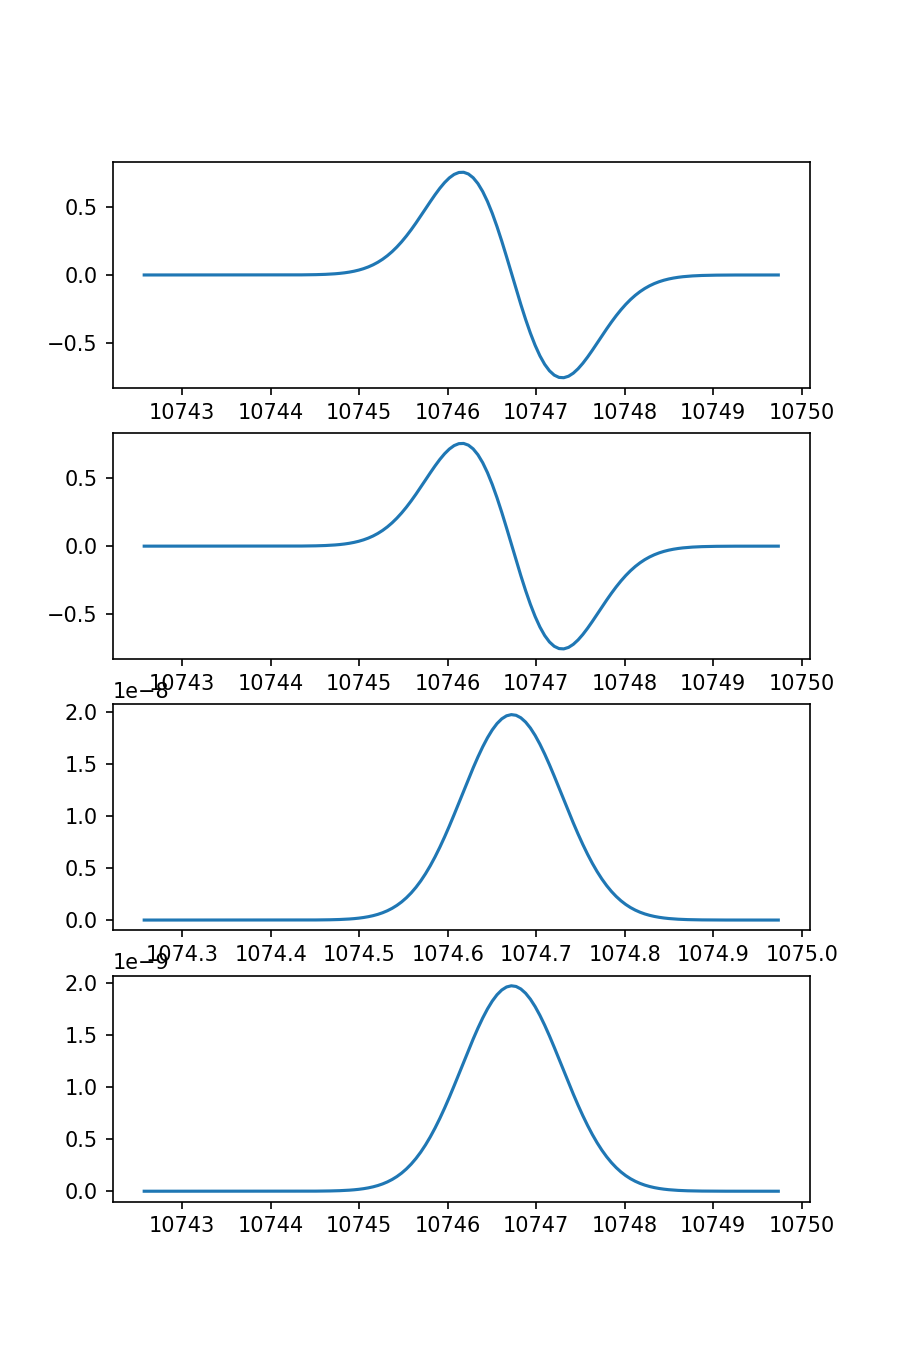

In [12]:
fig,ax = plt.subplots(4,1,figsize = (6,9))
ax = ax.flatten()
ax[0].plot(wva, np.gradient(aas[1][:,0]*10 /aat[0], aas[0]/10)/100)
ax[1].plot(wva, np.gradient(aas[1][:,0] /aat[0], aas[0] ))

ax[2].plot(wva/10, aas[1][:,0]*10)
ax[3].plot(wva, aas[1][:,0] )


In [130]:
svmin=np.argwhere(stksa[:,3]  == np.min(stksa[:,3] ) )[-1,0]                    ## position of minimum/negative Stokes V lobe
svmax=np.argwhere(stksa[:,3]  == np.max(stksa[:,3] ) )[-1,0]                    ## position of maximum/positive Stokes V lobe
## Simple sum ov Stokes V is insufficient to recover the emission coefficients because of the normalization of the profiles. See pycelp calc_stokesSpec for the formulation.
## We now define the factor, divide by the normalization and then minimize along the spectral axis.
## The difference between thev emission coefficient and this method is ~1.0045, matching pretty well.
#sobs_tot_1pix[3]=(np.sign(svmin-svmax))*np.sum(np.abs(tmp2[:-1,3])*dwv)  ## Sum the absolute of Stokes V signal and assign sign based on svmin and svmax lobe positions
dIdlnorm_fact = np.gradient(stksa[:,0] /epsIa,wva)
np.nanmean(stksa[:,3]/dIdlnorm_fact)

np.float64(-1.55237672429502e-12)

In [249]:
print(np.sum(aas[1][:,0]* np.diff(aas[0],append=aas[0][-1] - aas[0][-2]) ))
print(np.sum(aas[1][:-1,0]* np.diff(aas[0] )))2828
print(aat[0])
print(np.sum(aas[1][:,0]))

3.6978768674645355e-09
3.7184131506503132e-09
3.7184134032653154e-09
6.90315329449196e-08


In [284]:
from scipy.integrate import simpson

total_signal = simpson(np.abs(aas[1][:,3]), aas[0])

print("Total signal (Simpson's Rule):", total_signal)

from scipy.integrate import trapezoid

total_flux = trapezoid(np.abs(aas[1][:,3]), aas[0])

print("Total unsigned flux (trapezoidal rule):", total_flux)

Total signal (Simpson's Rule): 2.240086939740456e-12
Total unsigned flux (trapezoidal rule): 2.2413087047185245e-12


In [347]:
#plt.figure()
#plt.plot(aas[1][:,3])
print(-np.sum(np.abs(aas[1][:-1,3])* np.diff(aas[0]))/np.sum(np.abs(aas[1][:-1,0])* np.diff(aas[0])) )
print(aat[3]/aat[0])
print(-np.sum(np.abs(aas[1][:-1,3]) * np.diff(aas[0])))
print(aat[3])

#print(np.trapz(aas[1][:,3],x=aas[0]))

-0.0006027594049465699
-0.0004276546629821022
-2.241308498031483e-12
-1.59019683080156e-12


In [295]:
gg1 = aas[1][:,3]
ggmin = gg1[gg1<0]
ggmax = gg1[gg1>0]
print(gg1.shape,ggmin.shape,ggmax.shape,78+56)
print(np.abs(trapezoid(ggmin,aas[0][:78]))+np.abs(trapezoid(ggmax,aas[0][:56])))

(134,) (78,) (56,) 134
2.236246950803925e-12


In [269]:
#plt.figure()
#plt.plot(aas[1][:,3])
print(-np.sum(np.abs(aas[1][:-1,3])* np.diff(aas[0]))/np.sum(np.abs(aas[1][:-1,0])* np.diff(aas[0])) )
print(aat[3]/aat[0])
print(-np.sum(np.abs(aas[1][:-1,3]) * np.diff(aas[0])))
print(aat[3])



-0.0006027594049465699
-0.0004276546629821022
-2.241308498031483e-12
-1.59019683080156e-12


Recovered value of a: -23.927874427173492


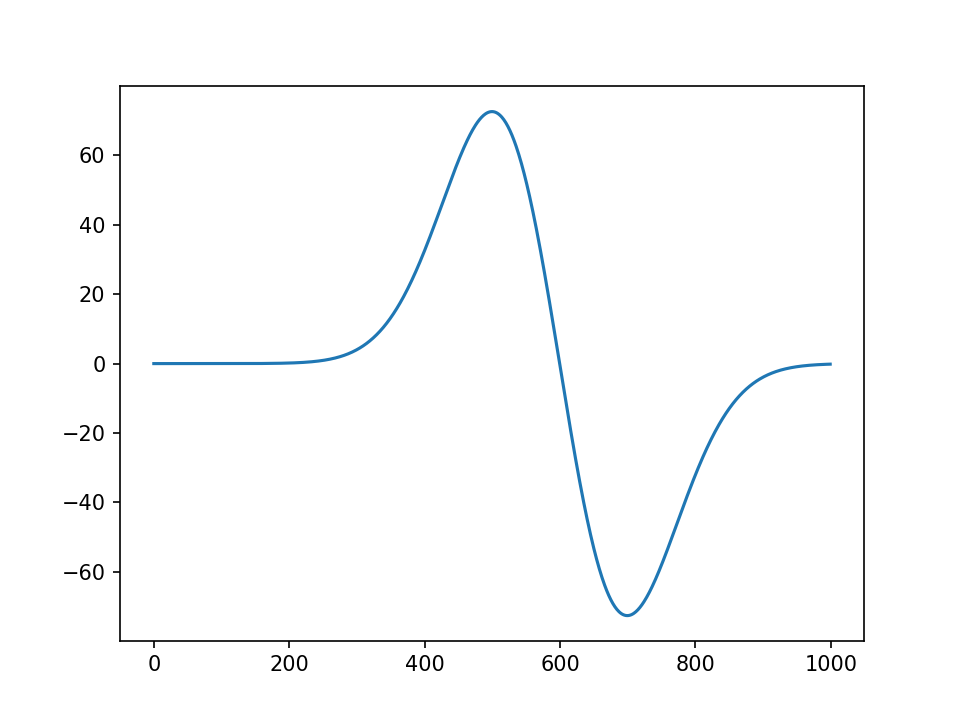

In [302]:
def wprof(wvvec, wv0, sig):
    """ Gaussian profile """
    return 1./(np.sqrt(2.*np.pi)*sig) * np.exp(-(wvvec - wv0)**2./(2.*sig**2.))

def wprof_derivative(wvvec, wv0, sig):
    """ Derivative of the Gaussian profile """
    return - (wvvec - wv0) / sig**2 * wprof(wvvec, wv0, sig)

# Define parameters
wvvec = np.linspace(1074, 1075, 1000)  # Integration range
wv0 = 1074.6  # Center
sig = 0.1  # Standard deviation
a = 3  # Constant multiplier

# Compute function values
dwprof_values = wprof_derivative(wvvec, wv0, sig)
f_values = a * dwprof_values  # Multiply by constant a

plt.figure()
plt.plot(f_values)

# # Integrate numerically
# integral_value = trapezoid(np.abs(f_values), wvvec)

# # Compute the normalization factor (integral of |dwprof|)
# normalization_factor = trapezoid(np.abs(dwprof_values), wvvec)

# # Corrected integral: normalized to recover `a`
# integral_value = trapezoid(np.abs(f_values), wvvec) / normalization_factor

# Integrate only over the positive half
positive_region = wvvec > wv0  # Select values where wvvec > wv0
integral_value = trapezoid(f_values[positive_region], wvvec[positive_region]) * 2  # Multiply by 2 to account for symmetry


print("Recovered value of a:", integral_value)

In [13]:

aat=np.array(aat)
bbt=np.array(bbt)
aat[3]=aat[3]/10
bbt[3]=bbt[3]/10

In [14]:
#len(aat)#[1]
#aas[1][:,3] = aas[1][:,3]*10
#bbs[1][:,3] = bbs[1][:,3]*10
np.savez(f'../tests/sample_test_stokesspectra',aat=aat,bbt=bbt,awl=aas[0],aas=aas[1]*10,bwl=bbs[0],bbs=bbs[1]*10,allow_pickle=True)